<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/logo_ciencia_datos.png">

<br><br><center><h1 style="font-size:2em;color:#2467C0">Caso de estudio: Delitos en Estados Unidos </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/crimenesUSA.png" align="middle" style="width:550px;"/></td>
<td>
    
En este proyecto se analizaran datos de arrestos en Estados Unidos en el año 1973 por cada 100,000 habitantes. También proporciona el porcentaje de la población que vive en áreas urbanas dentro del estado.    

Las variables del archivo de datos son:
    
'US_state'  :  Entidad de Estados Unidos
    
'UrbanPop' : Porcentaje de población urbana
    
'Murder' : Asesinato
    
'Assault' : Asalto 
    
'Rape' :   Abuso   

    
<br>
</td>
</tr>
</table>

# 1. Importar librerías generales

In [2]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline

# 2. Obtención de datos

In [3]:
# Ubicación de los datos en github
#url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/USArrests.csv'
#df = pd.read_csv(url)

df = pd.read_csv('datos/USArrests.csv') 

In [4]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [30]:
#renombramos la primera columna
df = df.rename(columns={'Unnamed: 0': 'US_state'})
df.head()


,US_state,UrbanPop,Murder,Assault,Rape,cluster
0,Alabama,58,13.2,236,21.2,2
1,Alaska,48,10.0,263,44.5,4
2,Arizona,80,8.1,294,31.0,4
3,Arkansas,50,8.8,190,19.5,2
4,California,91,9.0,276,40.6,4


In [6]:
df = df[['US_state', 'UrbanPop', 'Murder', 'Assault','Rape']]

In [40]:
df.head()

,US_state,UrbanPop,Murder,Assault,Rape,cluster
0,Alabama,58,13.2,236,21.2,2
1,Alaska,48,10.0,263,44.5,4
2,Arizona,80,8.1,294,31.0,4
3,Arkansas,50,8.8,190,19.5,2
4,California,91,9.0,276,40.6,4


# 3. Análisis Exploratorio

In [8]:
#Principales parámetros estadísticos
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


c:\Users\perez\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


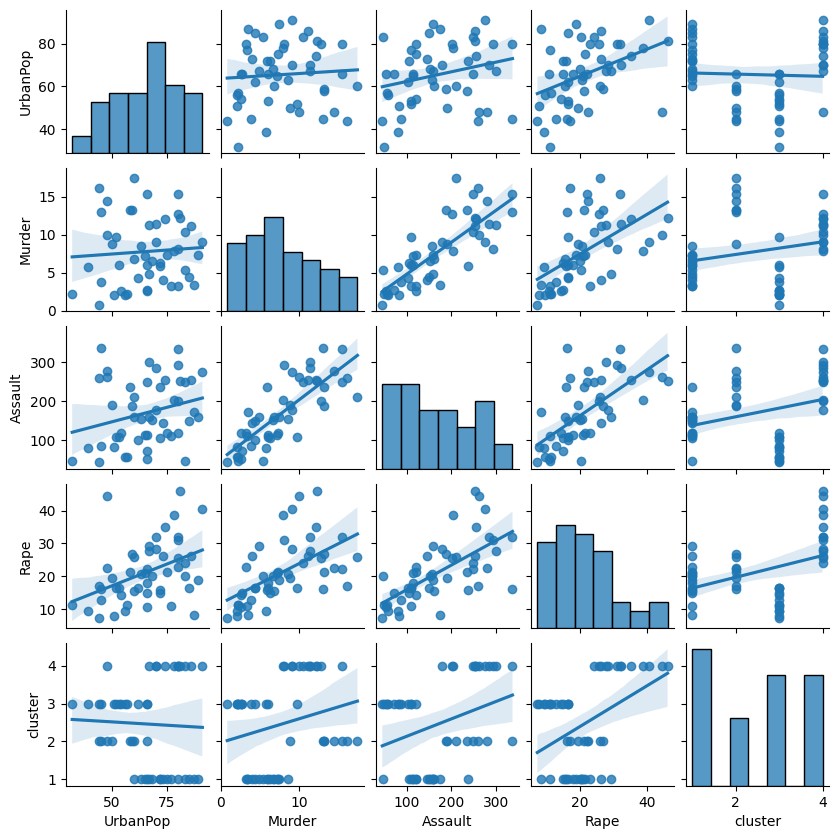

In [33]:
# Correlación lineal de variables
sns.pairplot(df, kind="reg",  height=1.7 , aspect=1)
plt.show()

# 4. Normalización de datos

In [10]:
#Selección de caracteristicas para llevar a cabo el agrupamiento
features = ['Murder','Assault','UrbanPop','Rape']

In [11]:
#Re-esalamiento de variables
from sklearn import preprocessing
df_standardized = preprocessing.scale(df[features])

In [12]:
df_standardized 

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

(array([5., 8., 5., 9., 6., 3., 5., 4., 3., 2.]),
 array([-1.62069341, -1.23569755, -0.85070169, -0.46570583, -0.08070998,
         0.30428588,  0.68928174,  1.0742776 ,  1.45927346,  1.84426932,
         2.22926518]),
 <BarContainer object of 10 artists>)

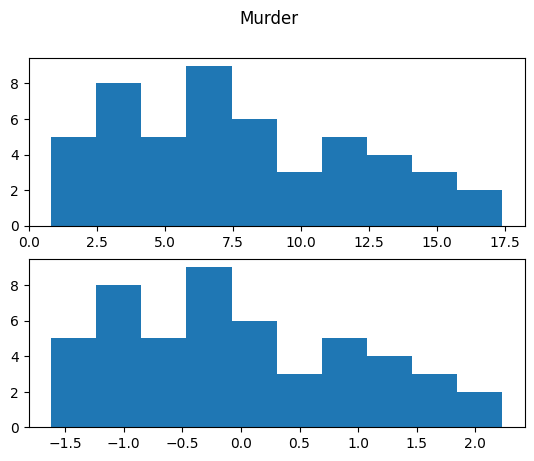

In [13]:
#Comparación antes y despues de la normalización (re-escalamiento)
Murder_list=df_standardized[:,:1].flatten()
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Murder')
ax1.hist(df['Murder'])
ax2.hist( Murder_list)

In [14]:
# Data frame que servirá para la predicción de grupos
df_standardized = pd.DataFrame(df_standardized)

In [15]:
df_standardized.head()

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


# 5. Separación de los datos en grupos

In [16]:
# Llamamos al algoritmo y lo ejecutamos  para 1 cluster
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 1, init = 'k-means++', random_state = 42)
kmeans.fit(df_standardized)
# Valor de WCSS
kmeans.inertia_

c:\Users\perez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


200.00000000000003

# 6. Método del codo

In [17]:
# Se obtienen los diferentes valores de WCSS 
wcss = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_standardized)
    wcss.append(kmeans.inertia_)

c:\Users\perez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\perez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\perez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\perez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [18]:
wcss

[200.00000000000003,
 104.96163315756871,
 80.08569526137275,
 57.55425863091104,
 50.051196729664916,
 44.0921281550805,
 40.67588479504112,
 36.073709589324494,
 31.612331346177616,
 27.525844740519265,
 24.648224142619902,
 23.152196732541782]

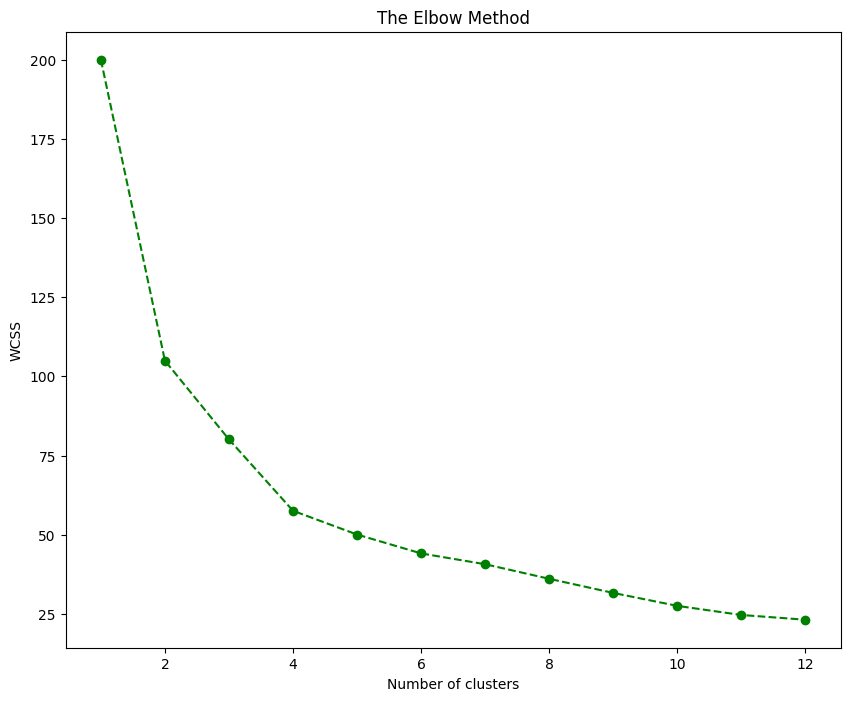

In [19]:
# Grafica de los valores de WCSS 
plt.figure(figsize=(10, 8))
plt.plot(range(1, 13), wcss,"go--")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# 8. Método Silhouette

In [34]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_score(df_standardized, kmeans.labels_)

0.33968891433344395

In [35]:
#creamos una lista de modelos de K-Means de un determinado número de clusters llamado kmeans2_sil
kmeans2_sil= [KMeans(n_clusters=i, random_state=11, init='k-means++').fit(df_standardized) for i in range(1,13)]

#calculamos el silhouette score a cada modelo (de diferente número de clusters)
sil_values = [ silhouette_score(df_standardized, model.labels_, random_state=11)
                    for model in kmeans2_sil[1:]
                   ]
#Guardamos los valores de los coeficientes en un arreglo de numpy
sil_values = np.array( sil_values )
sil_values

c:\Users\perez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\perez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\perez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\perez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

array([0.40848903, 0.31106028, 0.33968891, 0.30539103, 0.2890358 ,
       0.27267592, 0.25129031, 0.2663206 , 0.25782776, 0.25613948,
       0.25996135])

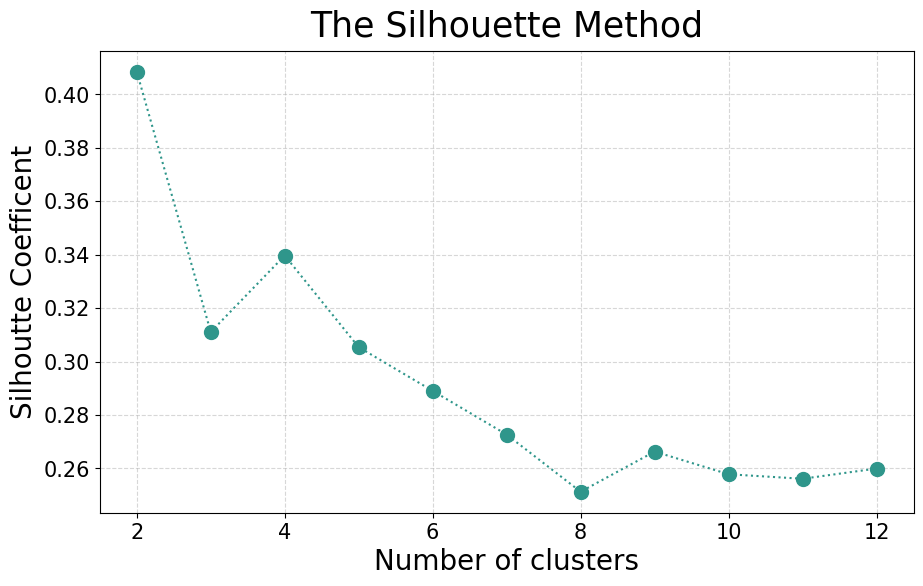

In [36]:
plt.figure( figsize=(10.5,6)       )

plt.plot(range(2, 13), sil_values,
         linestyle = ':', linewidth = 1.5,
         marker = 'o', markersize = 10,
         color = '#2F968B' ,
         label = 'The Silhoutte Method'
        )

#Maquillar la gráfica
plt.title('The Silhouette Method', size = 25, pad = 10)
plt.xlabel('Number of clusters', size = 20)
plt.ylabel('Silhoutte Coefficent', size = 20)
plt.tick_params( labelsize = 15 )

plt.grid(linestyle = 'dashed', alpha = 0.5 )

plt.show()

In [37]:
print( 'El valor máximo es:', sil_values[ np.argmax(sil_values) ] )
print( 'El número óptimo de clusters es:', np.argmax(sil_values) + 1 + 1 )

El valor máximo es: 0.4084890326217641
El número óptimo de clusters es: 2


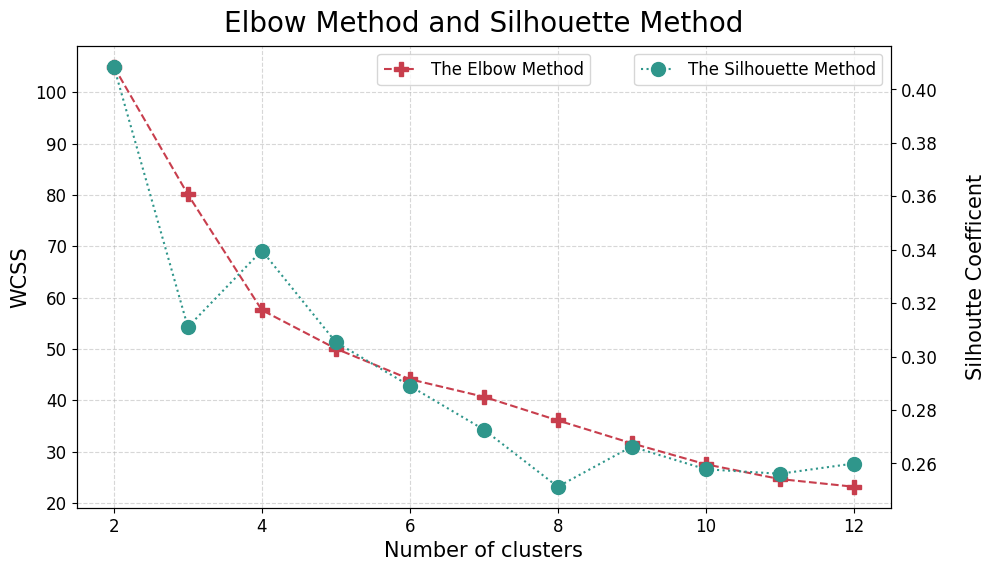

In [38]:
#clusters -----------------

ax1.set_xlabel( 'Number of clusters', size = 15 )
ax1.set_ylabel('WCSS', size = 15 )
ax1.tick_params( axis = 'x', labelsize = 12 )
ax1.tick_params( axis = 'y', labelsize = 12 )

plt.legend(loc='upper center', prop = {'size':12})

fig , ax1 = plt.subplots( figsize = (10.5,6) )

ax1.set_title('Elbow Method and Silhouette Method', size = 20, pad = 10 )
#--------------- WCSS -----------------
ax1.plot( range(2,13), wcss[1:],
         linestyle = '--', linewidth = 1.5,
         marker = 'P', markersize = 10,
         color = '#C83E4D' ,
         label = 'The Elbow Method'
        )

#----------- optimal number of
# ------------- silhoutte coeff -------------
ax2 = ax1.twinx()
ax2.plot( range(2,13), sil_values,
         linestyle = ':', linewidth = 1.5,
         marker = 'o', markersize = 10,
         color = '#2F968B' ,
         label = 'The Silhouette Method'
        )

ax2.set_ylabel( '\nSilhoutte Coefficent', size = 15 )
ax2.tick_params( axis = 'y', labelsize = 12 )
plt.legend(loc=0, prop = {'size':12})


ax1.grid(  linestyle = 'dashed', alpha = 0.5 )

plt.show()

# 7. Análisis de resultados

In [20]:
# Predicción de etiquetas
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_standardized)
y_kmeans

c:\Users\perez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 3, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0])

In [21]:
# Cambiamos los valores de los grupos para comenzar en 1 y lo agregamos al dataframe original
df['cluster'] = y_kmeans + 1
df.head()

,US_state,UrbanPop,Murder,Assault,Rape,cluster
0,Alabama,58,13.2,236,21.2,2
1,Alaska,48,10.0,263,44.5,4
2,Arizona,80,8.1,294,31.0,4
3,Arkansas,50,8.8,190,19.5,2
4,California,91,9.0,276,40.6,4


<Axes: xlabel='Murder', ylabel='Assault'>

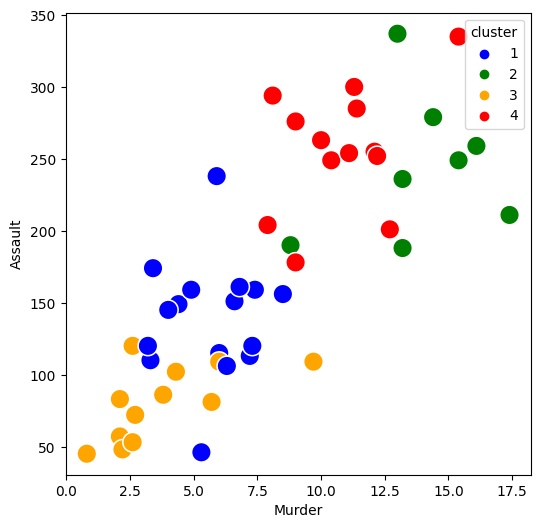

In [22]:
# Observamos la distribución de grupos en un par de variables
plt.figure(figsize=(6,6))
sns.scatterplot(x='Murder', y = 'Assault', hue='cluster',  
                palette=['blue','green','orange','red'] , data=df, s=200)

c:\Users\perez\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x500 with 0 Axes>

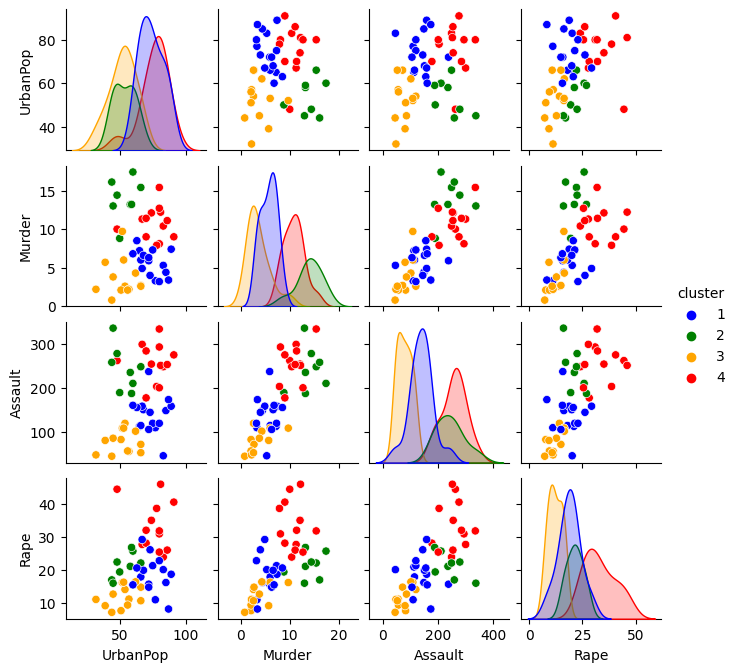

In [23]:
#Comparando a pares las variables
fig = plt.figure(figsize=(5, 5))
sns.pairplot(df, hue="cluster",  palette=['blue','green','orange','red'],height=1.7 , aspect=1)
plt.show()

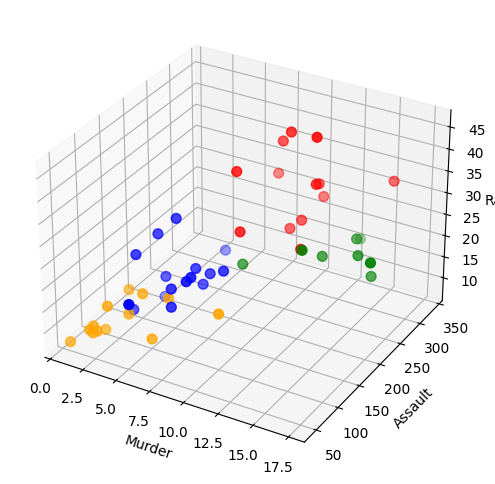

In [24]:
#Comparando los tres tipos de delitos

#%matplotlib notebook
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors

fig = plt.figure(figsize=(8, 6))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')

x = df['Murder']
y = df['Assault']
z = df['Rape']
colors = df['cluster']
cmap = matplotlib.colors.ListedColormap(['blue','green','orange','red'])
g=ax.scatter(x, y, z, s=50,  c =  colors  , cmap=cmap  )

ax.set_xlabel('Murder')
ax.set_ylabel('Assault')
ax.set_zlabel('Rape')

legend = ax.legend(*g.legend_elements(), loc="lower center", title="Cluster", borderaxespad=-10, ncol=4)
ax.add_artist(legend)
#ax.view_init(elev=20, azim=35, roll=0)


plt.show()

In [25]:
# Se define un dataframe para mostrar la informacion en un mapa
df_map  = df
df_map.head()

,US_state,UrbanPop,Murder,Assault,Rape,cluster
0,Alabama,58,13.2,236,21.2,2
1,Alaska,48,10.0,263,44.5,4
2,Arizona,80,8.1,294,31.0,4
3,Arkansas,50,8.8,190,19.5,2
4,California,91,9.0,276,40.6,4


In [26]:
# Información geográfica de los Estados Unidos
estados_geo = 'datos/estados_usa.json'

In [27]:
# Librería Python que permite crear mapas interactivos 
import folium
map = folium.Map(location=[53,-102], tiles='cartodbpositron',zoom_start=2.5)

In [28]:
folium.Choropleth(geo_data=estados_geo, data=df_map, # geo_path=country_geo, data=plot_data,
             columns=['US_state', 'cluster'],
             key_on='feature.properties.name',
             fill_color='Paired', fill_opacity=0.9, line_opacity=0.9
                 ).add_to(map)
map

## Observaciones

<img src="figuras/analisis_datos.jpg" align="middle" style="width:850px;"/></td>

Grupo 1(azul): La región del Sureste  los asesinatos tienen altos índices de asesinatos.

Grupo 2(verde): Se encuentra en el Centro y tiene valores promedio. 

Grupo 3(anaranjado-rosa): Se encuentra al Norte y se destaca por la tasa mínima de delitos.

Grupo 4(rojo): Los estados del Suroeste  tienen los mas altos índices de asaltos y violaciones.

